## Imports

In [1]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests

import yfinance as yf

import plotly.graph_objects as go

In [2]:
company_df = pd.read_excel("/content/Bursa_Company_List.xlsx", dtype = {"Symbol" : str})
company_df.head()

,Symbol,Company Name,Short Company Name
0,5250,7-ELEVEN MALAYSIA HOLDINGS BERHAD,SEM
1,7167,johore-tin-bhd,ABLEGLOB
2,7086,go-innovate-asia-bhd,ABLEGRP
3,5198,ABM FUJIYA BERHAD,AFUJIYA
4,03028,ACE INNOVATE ASIA BERHAD,GOINNO


## Extract stocks by sector

In [3]:
'''
Comsumer          - 0001I
Technology        - 0005I
REIT              - 0050I
Construction      - 0003I
Industrial        - 0002I
Property          - 0020I
Energy            - 0061I
Financial         - 0010I
Plantation        - 0025I
Transportation    - 0064I
Utility           - 0065I
Telecommunication - 0063I
Health Care       - 0062I
'''

headers = {
    "User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/117.0"
}

priceTargetUrl = 'https://www.klsescreener.com/v2/markets/bursa/0001I'
page = requests.get(priceTargetUrl,headers = headers)
html = page.content
soup = BeautifulSoup(html)

In [4]:
sector_codes = {
    "Consumer": "0001I",
    "Technology": "0005I",
    "REIT": "0050I",
    "Construction": "0003I",
    "Property": "0020I",
    "Energy": "0061I",
    "Financial": "0010I",
    "Plantation": "0025I",
    "Transportation": "0064I",
    "Utility": "0065I",
    "Telecommunication": "0063I",
    "Health Care": "0062I",
    "Induatrial" : "0002I"
}

In [5]:
test = [x.text.strip() for x in soup.find_all('div', class_ = "card-body")]

In [6]:
[x for x in test[3].replace("\n"," ").split(" ") if x]

['NESTLE',
 '105.400',
 '24.7B',
 '1.800',
 '(1.7%)',
 '880',
 'Food',
 '&',
 'Beverages']

In [7]:
test[3].split()

['NESTLE',
 '105.400',
 '24.7B',
 '1.800',
 '(1.7%)',
 '880',
 'Food',
 '&',
 'Beverages']

In [8]:
def aggregrate_stocks_by_sector(sector_code, sector_dict):
  headers = {
    "User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/117.0"
  }

  priceTargetUrl = f'https://www.klsescreener.com/v2/markets/bursa/{sector_code}'
  page = requests.get(priceTargetUrl,headers = headers)
  html = page.content
  soup = BeautifulSoup(html)

  raw_stock_data = [x.text.strip() for x in soup.find_all('div', class_ = "card-body")]

  for stock_data in raw_stock_data[3:]:
   formatted_stock_data = [x for x in stock_data.replace("\n"," ").split(" ") if x]
   if formatted_stock_data[0] not in company_df["Short Company Name"].values:
     continue
   if formatted_stock_data[4][0] != '(':
     if ' '.join(formatted_stock_data[4:]) not in sector_dict:
       sector_dict[' '.join(formatted_stock_data[4:])] = []
       sector_dict[' '.join(formatted_stock_data[4:])].append([company_df[company_df["Short Company Name"] == formatted_stock_data[0]]["Symbol"].values[0]] + formatted_stock_data[0 : 4] + [' '.join(formatted_stock_data[4:])])
     else:
       sector_dict[' '.join(formatted_stock_data[4:])].append([company_df[company_df["Short Company Name"] == formatted_stock_data[0]]["Symbol"].values[0]] + formatted_stock_data[0 : 4] + [' '.join(formatted_stock_data[4:])])
   else:
     if ' '.join(formatted_stock_data[6:]) not in sector_dict:
       sector_dict[' '.join(formatted_stock_data[6:])] = []
       sector_dict[' '.join(formatted_stock_data[6:])].append([company_df[company_df["Short Company Name"] == formatted_stock_data[0]]["Symbol"].values[0]] + formatted_stock_data[0 : 6] + [' '.join(formatted_stock_data[6:])])
     else:
       sector_dict[' '.join(formatted_stock_data[6:])].append([company_df[company_df["Short Company Name"] == formatted_stock_data[0]]["Symbol"].values[0]] + formatted_stock_data[0 : 6] + [' '.join(formatted_stock_data[6:])])

  return sector_dict

def print_particular_sector_stock(sector_dict):
  for sector, stock_list in sector_dict.items():
    print(sector, " : ")
    print("----------------------------------------")
    for stock in stock_list:
      print(stock)
    print()


In [9]:
construction_sector = {}
construction_sector = aggregrate_stocks_by_sector("0003I", construction_sector)

print_particular_sector_stock(construction_sector)

Construction  : 
----------------------------------------
['3565', 'WCEHB', '0.785', '2.3B', '0.065', '(9%)', '41,214', 'Construction']
['7195', 'BNASTRA', '1.400', '1.5B', '0.060', '(4.5%)', '80,826', 'Construction']
['9598', 'PTARAS', '1.480', '245.4M', '0.040', '(2.8%)', '535', 'Construction']
['0273', 'VLB', '0.545', '514.6M', '0.035', '(6.9%)', '63,128', 'Construction']
['5622', 'PEB', '0.950', '65.6M', '0.030', '(3.3%)', '261', 'Construction']
['5253', 'ECONBHD', '0.430', '609.5M', '0.020', '(4.9%)', '85,104', 'Construction']
['0045', 'SSB8', '0.585', '1.3B', '0.020', '(3.5%)', '22,868', 'Construction']
['5293', 'AME', '1.520', '973.8M', '0.020', '(1.3%)', '1,592', 'Construction']
['5703', 'MUHIBAH', '0.860', '626.5M', '0.015', '(1.8%)', '30,075', 'Construction']
['5171', 'KIMLUN', '1.430', '505.3M', '0.010', '(0.7%)', '2,474', 'Construction']
['9679', 'WCT', '1.030', '1.5B', '0.010', '(1%)', '114,719', 'Construction']
['5205', 'SENDAI', '0.515', '402.2M', '0.010', '(2%)', '19,33

In [10]:
plantation_sector = {}
plantation_sector = aggregrate_stocks_by_sector("0025I", plantation_sector)

print_particular_sector_stock(plantation_sector)

Plantation  : 
----------------------------------------
['2542', 'RVIEW', '3.180', '206.2M', '0.180', '(6%)', '61', 'Plantation']
['5047', 'NPC', '1.900', '228M', '0.080', '(4.4%)', '35', 'Plantation']
['1899', 'BKAWAN', '19.660', '7.8B', '0.040', '(0.2%)', '20', 'Plantation']
['5012', 'TAANN', '4.010', '1.7B', '0.030', '(0.8%)', '3,561', 'Plantation']
['5138', 'HSPLANT', '1.740', '1.3B', '0.020', '(1.2%)', '2,167', 'Plantation']
['1929', 'CHINTEK', '7.710', '704.4M', '0.010', '(0.1%)', '13', 'Plantation']
['5135', 'SWKPLNT', '2.220', '621.6M', '0.010', '(0.5%)', '1,609', 'Plantation']
['4383', 'JTIASA', '1.080', '1B', '0.010', '(0.9%)', '15,283', 'Plantation']
['0189', 'MATANG', '0.090', '215M', '0.005', '(5.9%)', '5,062', 'Plantation']
['2038', 'NSOP', '3.850', '270.2M', '0', 'Plantation']
['2593', 'UMCCA', '5.100', '1B', '269', 'Plantation']
['03055', 'DSR', '1.180', '385.2M', '0', 'Plantation']
['4316', 'SHCHAN', '0.325', '96.8M', '545', 'Plantation']
['5026', 'MHC', '0.945', '185.

In [11]:
utility_sector = {}
utility_sector = aggregrate_stocks_by_sector("0065I", utility_sector)

print_particular_sector_stock(utility_sector)

Electricity  : 
----------------------------------------
['5347', 'TENAGA', '14.900', '86.6B', '0.340', '(2.3%)', '242,688', 'Electricity']
['3069', 'MFCB', '4.490', '4.4B', '0.020', '(0.4%)', '5,424', 'Electricity']
['5264', 'MALAKOF', '0.925', '4.6B', '0.010', '(1.1%)', '193,612', 'Electricity']
['7471', 'EDEN', '0.150', '75.8M', '0.010', '(6.3%)', '11,036', 'Electricity']

Gas, Water & Multi-Utilities  : 
----------------------------------------
['5272', 'RANHILL', '1.320', '1.7B', '0.020', '(1.5%)', '10,574', 'Gas, Water & Multi-Utilities']
['4677', 'YTL', '3.040', '33.6B', '0.020', '(0.7%)', '113,083', 'Gas, Water & Multi-Utilities']
['0011', 'BTECH', '0.330', '83.1M', '0.010', '(3.1%)', '1,967', 'Gas, Water & Multi-Utilities']
['8567', 'SALCON', '0.350', '362.4M', '0.010', '(2.9%)', '9,846', 'Gas, Water & Multi-Utilities']
['8524', 'TALIWRK', '0.785', '1.5B', '1,595', 'Gas, Water & Multi-Utilities']
['6033', 'PETGAS', '18.280', '36.1B', '0.020', '(0.1%)', '7,445', 'Gas, Water & M

In [12]:
energy_sector = {}
energy_sector = aggregrate_stocks_by_sector("0061I", energy_sector)

print_particular_sector_stock(energy_sector)

Energy, Infrastructure, Equipment & Services  : 
----------------------------------------
['5132', 'DELEUM', '1.520', '610.3M', '0.090', '(6.3%)', '19,546', 'Energy, Infrastructure, Equipment & Services']
['5133', 'PENERGY', '1.430', '460.1M', '0.030', '(2.1%)', '305', 'Energy, Infrastructure, Equipment & Services']
['5186', 'MHB', '0.465', '744M', '0.015', '(3.3%)', '9,531', 'Energy, Infrastructure, Equipment & Services']
['7228', 'T7GLOBAL', '0.485', '396.6M', '0.010', '(2.1%)', '2,390', 'Energy, Infrastructure, Equipment & Services']
['0220', 'OVH', '0.185', '77.6M', '0.010', '(5.7%)', '53,975', 'Energy, Infrastructure, Equipment & Services']
['0219', 'RL', '0.285', '95.4M', '0.010', '(3.6%)', '31,002', 'Energy, Infrastructure, Equipment & Services']
['5255', 'ICON', '1.280', '796.8M', '48,330', 'Energy, Infrastructure, Equipment & Services']
['5243', 'VELESTO', '0.205', '1.6B', '157,830', 'Energy, Infrastructure, Equipment & Services']
['03049', 'SKHAWK', '0.110', '44.7M', '0', 'En

In [13]:
health_care_sector = {}
health_care_sector = aggregrate_stocks_by_sector("0062I", health_care_sector)

print_particular_sector_stock(health_care_sector)

Health Care Equipment & Services  : 
----------------------------------------
['5168', 'HARTA', '2.610', '8.9B', '0.130', '(5.2%)', '87,502', 'Health Care Equipment & Services']
['7153', 'KOSSAN', '1.910', '4.8B', '0.050', '(2.7%)', '54,898', 'Health Care Equipment & Services']
['7113', 'TOPGLOV', '0.970', '7.9B', '0.030', '(3.2%)', '212,890', 'Health Care Equipment & Services']
['7106', 'SUPERMX', '0.810', '2.2B', '0.015', '(1.9%)', '51,137', 'Health Care Equipment & Services']
['7803', 'HEXCARE', '0.200', '229.8M', '0.010', '(5.3%)', '15,905', 'Health Care Equipment & Services']
['7191', 'ADVENTA', '0.290', '88.6M', '0.010', '(3.6%)', '4,648', 'Health Care Equipment & Services']
['0163', 'CAREPLS', '0.280', '196.1M', '0.010', '(3.7%)', '32,362', 'Health Care Equipment & Services']
['0001', 'SCOMNET', '1.250', '1B', '5,729', 'Health Care Equipment & Services']
['0182', 'LKL', '0.115', '44.6M', '1,409', 'Health Care Equipment & Services']
['0155', 'MGRC', '0.370', '50.7M', '12,046', 'H

In [14]:
property_sector = {}
property_sector = aggregrate_stocks_by_sector("0020I", property_sector)

print_particular_sector_stock(property_sector)

Property  : 
----------------------------------------
['5827', 'OIB', '1.360', '631.8M', '0.080', '(6.3%)', '205', 'Property']
['6378', 'WMG', '0.505', '224.5M', '0.065', '(14.8%)', '39,914', 'Property']
['7066', 'YONGTAI', '0.275', '117.8M', '0.045', '(19.6%)', '280,786', 'Property']
['8206', 'ECOWLD', '1.580', '4.6B', '0.030', '(1.9%)', '33,820', 'Property']
['8583', 'MAHSING', '1.680', '4.3B', '0.030', '(1.8%)', '49,964', 'Property']
['3913', 'MUIPROP', '0.450', '343.8M', '0.030', '(7.1%)', '187,676', 'Property']
['6076', 'ENCORP', '0.260', '82.3M', '0.020', '(8.3%)', '250', 'Property']
['1538', 'SYMLIFE', '0.270', '193.4M', '0.020', '(8%)', '3,450', 'Property']
['6602', 'BCB', '0.355', '146.4M', '0.020', '(6%)', '11,518', 'Property']
['5789', 'LBS', '0.635', '1B', '0.020', '(3.3%)', '22,613', 'Property']
['5062', 'HUAYANG', '0.320', '140.8M', '0.020', '(6.7%)', '1,553', 'Property']
['1651', 'MRCB', '0.615', '2.7B', '0.020', '(3.4%)', '316,884', 'Property']
['6718', 'CRESNDO', '4.69

In [15]:
consumer_sector = {}
consumer_sector = aggregrate_stocks_by_sector("0001I", consumer_sector)

print_particular_sector_stock(consumer_sector)

Food & Beverages  : 
----------------------------------------
['4707', 'NESTLE', '105.400', '24.7B', '1.800', '(1.7%)', '880', 'Food & Beverages']
['2658', 'AJI', '15.020', '913.1M', '0.520', '(3.6%)', '1,820', 'Food & Beverages']
['2836', 'CARLSBG', '19.420', '5.9B', '0.120', '(0.6%)', '2,282', 'Food & Beverages']
['6432', 'APOLLO', '6.600', '528M', '0.080', '(1.2%)', '40', 'Food & Beverages']
['7035', 'CCK', '1.730', '1B', '0.050', '(3%)', '15,903', 'Food & Beverages']
['7103', 'SPRITZER', '2.620', '836.6M', '0.040', '(1.6%)', '2,834', 'Food & Beverages']
['0260', 'PTRB', '0.590', '315.6M', '0.035', '(6.3%)', '10,032', 'Food & Beverages']
['5102', 'GCB', '2.950', '3.4B', '0.030', '(1%)', '14,832', 'Food & Beverages']
['7107', 'OFI', '1.820', '436.8M', '0.020', '(1.1%)', '316', 'Food & Beverages']
['0212', 'SDS', '1.210', '495.6M', '0.020', '(1.7%)', '11,611', 'Food & Beverages']
['3662', 'MFLOUR', '0.755', '935.5M', '0.010', '(1.3%)', '16,785', 'Food & Beverages']
['7167', 'ABLEGLOB'

In [16]:
technology_sector = {}
technology_sector = aggregrate_stocks_by_sector(sector_codes["Technology"], technology_sector)

print_particular_sector_stock(technology_sector)

Technology Equipment  : 
----------------------------------------
['0208', 'GREATEC', '4.810', '6B', '0.070', '(1.5%)', '14,824', 'Technology Equipment']
['7160', 'PENTA', '4.100', '2.9B', '0.060', '(1.5%)', '4,529', 'Technology Equipment']
['0246', 'CNERGEN', '0.515', '256.4M', '0.015', '(3%)', '12,109', 'Technology Equipment']
['0181', 'AEMULUS', '0.305', '204.7M', '0.010', '(3.4%)', '11,254', 'Technology Equipment']
['0085', 'MLAB', '0.095', '27.4M', '0.010', '(11.8%)', '27,770', 'Technology Equipment']
['0090', 'ELSOFT', '0.455', '315.8M', '0.005', '(1.1%)', '1,581', 'Technology Equipment']
['0005', 'UCREST', '0.125', '92.9M', '0.005', '(4.2%)', '12,693', 'Technology Equipment']
['0209', 'AIMFLEX', '0.195', '287.2M', '0.005', '(2.6%)', '95,249', 'Technology Equipment']
['9393', 'ITRONIC', '0.040', '28.3M', '0.005', '(14.3%)', '20,727', 'Technology Equipment']
['0169', 'SMTRACK', '0.030', '39.6M', '0.005', '(20%)', '14,130', 'Technology Equipment']
['0111', 'K1', '0.190', '158M', '2

In [17]:
financial_sector = {}
financial_sector = aggregrate_stocks_by_sector(sector_codes["Financial"], financial_sector)

print_particular_sector_stock(financial_sector)

Banking  : 
----------------------------------------
['1295', 'PBBANK', '4.800', '93.1B', '0.050', '(1.1%)', '342,067', 'Banking']
['2488', 'ABMB', '4.330', '6.7B', '0.020', '(0.5%)', '15,093', 'Banking']
['5258', 'BIMB', '2.660', '6B', '0.010', '(0.4%)', '13,672', 'Banking']
['5185', 'AFFIN', '3.220', '7.7B', '0.040', '(1.2%)', '26,477', 'Banking']
['1066', 'RHBBANK', '6.070', '26.4B', '0.040', '(0.7%)', '48,614', 'Banking']
['1023', 'CIMB', '8.250', '88.3B', '0.050', '(0.6%)', '176,666', 'Banking']
['1155', 'MAYBANK', '10.700', '129.1B', '0.060', '(0.6%)', '108,400', 'Banking']
['1082', 'HLFG', '18.900', '21.6B', '0.080', '(0.4%)', '4,394', 'Banking']
['1015', 'AMBANK', '5.090', '16.8B', '0.090', '(1.7%)', '83,948', 'Banking']
['5819', 'HLBANK', '21.100', '45.7B', '0.160', '(0.8%)', '13,231', 'Banking']

Insurance  : 
----------------------------------------
['6139', 'TAKAFUL', '3.880', '3.2B', '0.020', '(0.5%)', '6,088', 'Insurance']
['6459', 'MNRB', '2.220', '1.7B', '0.010', '(0.5%

## Index and Volume Visualization by Sector

In [18]:
dict_stock_info = {}
total_market_cap = 0
for stock_info in technology_sector['Semiconductors']:
  stock_code = stock_info[0]
  stock_ticker = yf.Ticker(f"{stock_code}.KL")
  marketCap = stock_ticker.info['marketCap']
  stock_history= stock_ticker.history(period="2y")

  dict_stock_info[stock_code] = [marketCap, stock_history["Close"], stock_history["Volume"]]

  total_market_cap += marketCap

In [19]:
index_data = pd.Series(dtype = float)
volume_data = pd.Series(dtype = float)

for stock_code in dict_stock_info.keys():
  stock_info = dict_stock_info[stock_code]
  stock_weightage = stock_info[0] / total_market_cap
  if len(index_data) == 0:
    index_data = stock_info[1] * stock_weightage
  else:
    index_data += stock_info[1] * stock_weightage

  if len(volume_data) == 0:
    volume_data = stock_info[2]
  else:
    volume_data += stock_info[2]

In [20]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=index_data.index,
    y=index_data,
    mode='lines',
    name=stock_code
))

# Update layout for better visualization
fig.update_layout(
    title="Semiconductor Sector Index",
    xaxis_title="Date",
    yaxis_title="Index",
    hovermode="x unified"
)

# Show the interactive plot
fig.show()

In [34]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=volume_data.index,
    y=volume_data,
    mode='lines',
    name=stock_code
))

# Update layout for better visualization
fig.update_layout(
    title="Semiconductor Sector Volume",
    xaxis_title="Date",
    yaxis_title="Index",
    hovermode="x unified"
)

# Show the interactive plot
fig.show()

In [54]:
def get_stock_history_info(sector_dict, sub_sector):
  dict_stock_info = {}
  total_market_cap = 0
  for stock_info in sector_dict[sub_sector]:
    stock_code = stock_info[0]
    try:
      stock_ticker = yf.Ticker(f"{stock_code}.KL")
      marketCap = stock_ticker.info['marketCap']
      stock_history= stock_ticker.history(period="2y")
    except KeyError:
      print(stock_code)
      continue

    dict_stock_info[stock_code] = [marketCap, stock_history["Close"], stock_history["Volume"]]

    total_market_cap += marketCap

  index_data = pd.Series(dtype = float)
  volume_data = pd.Series(dtype = float)

  for stock_code in dict_stock_info.keys():
    stock_info = dict_stock_info[stock_code]
    stock_weightage = stock_info[0] / total_market_cap
    if len(index_data) == 0:
      index_data = stock_info[1] * stock_info[0] * stock_weightage
    else:
      index_data += stock_info[1] * stock_info[0] * stock_weightage

    if len(volume_data) == 0:
      volume_data = stock_info[2]
    else:
      volume_data += stock_info[2]

  return index_data, volume_data

def plot_index_data(index_data, subsector):
  fig = go.Figure()

  fig.add_trace(go.Scatter(
      x=index_data.index,
      y=index_data,
      mode='lines',
      name=stock_code
  ))

  # Update layout for better visualization
  fig.update_layout(
      title=f"{subsector} Sector Index",
      xaxis_title="Date",
      yaxis_title="Index",
      hovermode="x unified"
  )

  # Show the interactive plot
  fig.show()

def plot_volume_data(volume_data, subsector):
  fig = go.Figure()

  fig.add_trace(go.Scatter(
      x=volume_data.index,
      y=volume_data,
      mode='lines',
      name=stock_code
  ))

  # Update layout for better visualization
  fig.update_layout(
      title=f"{subsector} Sector Volume",
      xaxis_title="Date",
      yaxis_title="Index",
      hovermode="x unified"
  )

  # Show the interactive plot
  fig.show()

def print_sector_index_and_volume_graphs(sector_dict):
  for subsector in sector_dict.keys():
    index_data, volume_data = get_stock_history_info(sector_dict, subsector)
    plot_index_data(index_data, subsector)
    plot_volume_data(volume_data, subsector)

In [55]:
print_sector_index_and_volume_graphs(technology_sector)

03002
03022
03045
03008


03057
03041
03039


In [49]:
print_sector_index_and_volume_graphs(financial_sector)

In [56]:
print_sector_index_and_volume_graphs(consumer_sector)

03048


03009
03054


03037


03053
03015
03018
03019


03048
03054
03037
03053
03015
03018
03019


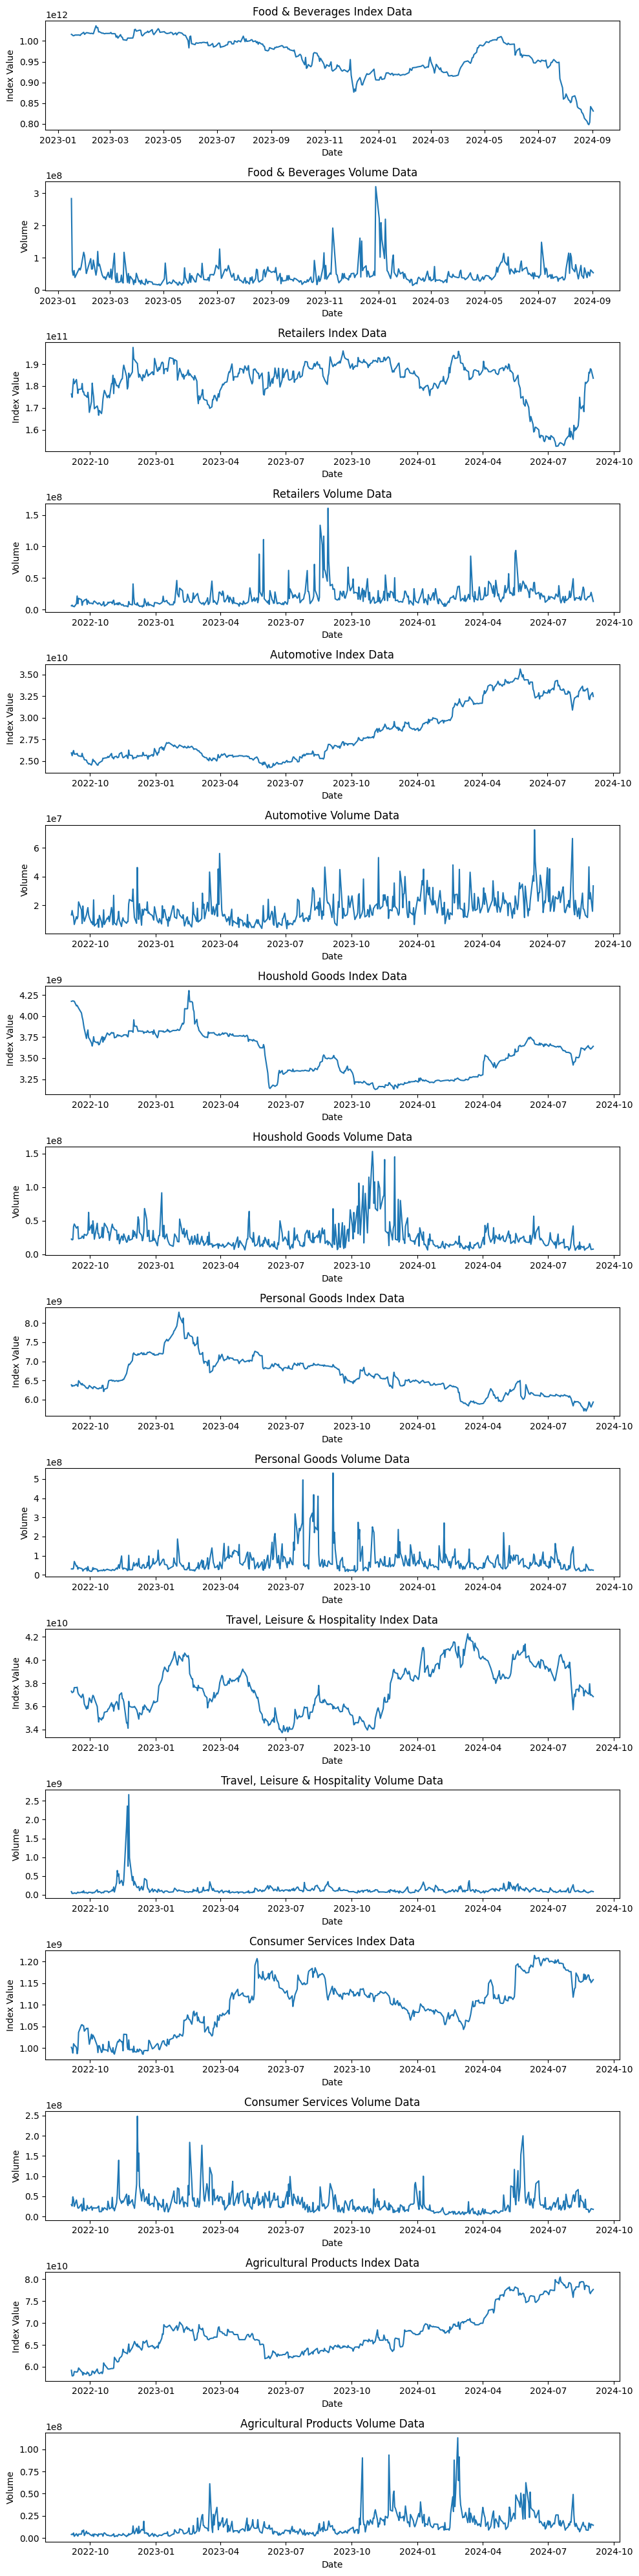

In [57]:
import matplotlib.pyplot as plt

def print_sector_index_and_volume_graphs(sector_dict, title):
    # Calculate the number of subplots needed (2 per subsector: one for index, one for volume)
    num_subsectors = len(sector_dict.keys())
    fig, axes = plt.subplots(num_subsectors * 2, 1, figsize=(10, 5 * num_subsectors))

    # Loop through each subsector and plot the data
    for i, subsector in enumerate(sector_dict.keys()):
        index_data, volume_data = get_stock_history_info(sector_dict, subsector)

        # Plot index data on the first column of the subplot row
        plot_index_data(index_data, subsector, ax=axes[i * 2])
        axes[i * 2].set_title(f"{subsector} Index Data")

        # Plot volume data on the second column of the subplot row
        plot_volume_data(volume_data, subsector, ax=axes[i * 2 +1])
        axes[i * 2 +1].set_title(f"{subsector} Volume Data")

    # Adjust layout and save the entire figure
    plt.tight_layout()
    plt.show()
    plt.savefig(f"{title}.png")
    plt.close()

def plot_index_data(index_data, subsector, ax=None):
    if ax is None:
        ax = plt.gca()
    # Example plotting code, replace with your actual plotting logic
    ax.plot(index_data.index, index_data)
    ax.set_xlabel('Date')
    ax.set_ylabel('Index Value')

def plot_volume_data(volume_data, subsector, ax=None):
    if ax is None:
        ax = plt.gca()
    # Example plotting code, replace with your actual plotting logic
    ax.plot(volume_data.index, volume_data)
    ax.set_xlabel('Date')
    ax.set_ylabel('Volume')

print_sector_index_and_volume_graphs(consumer_sector, "Consumer")

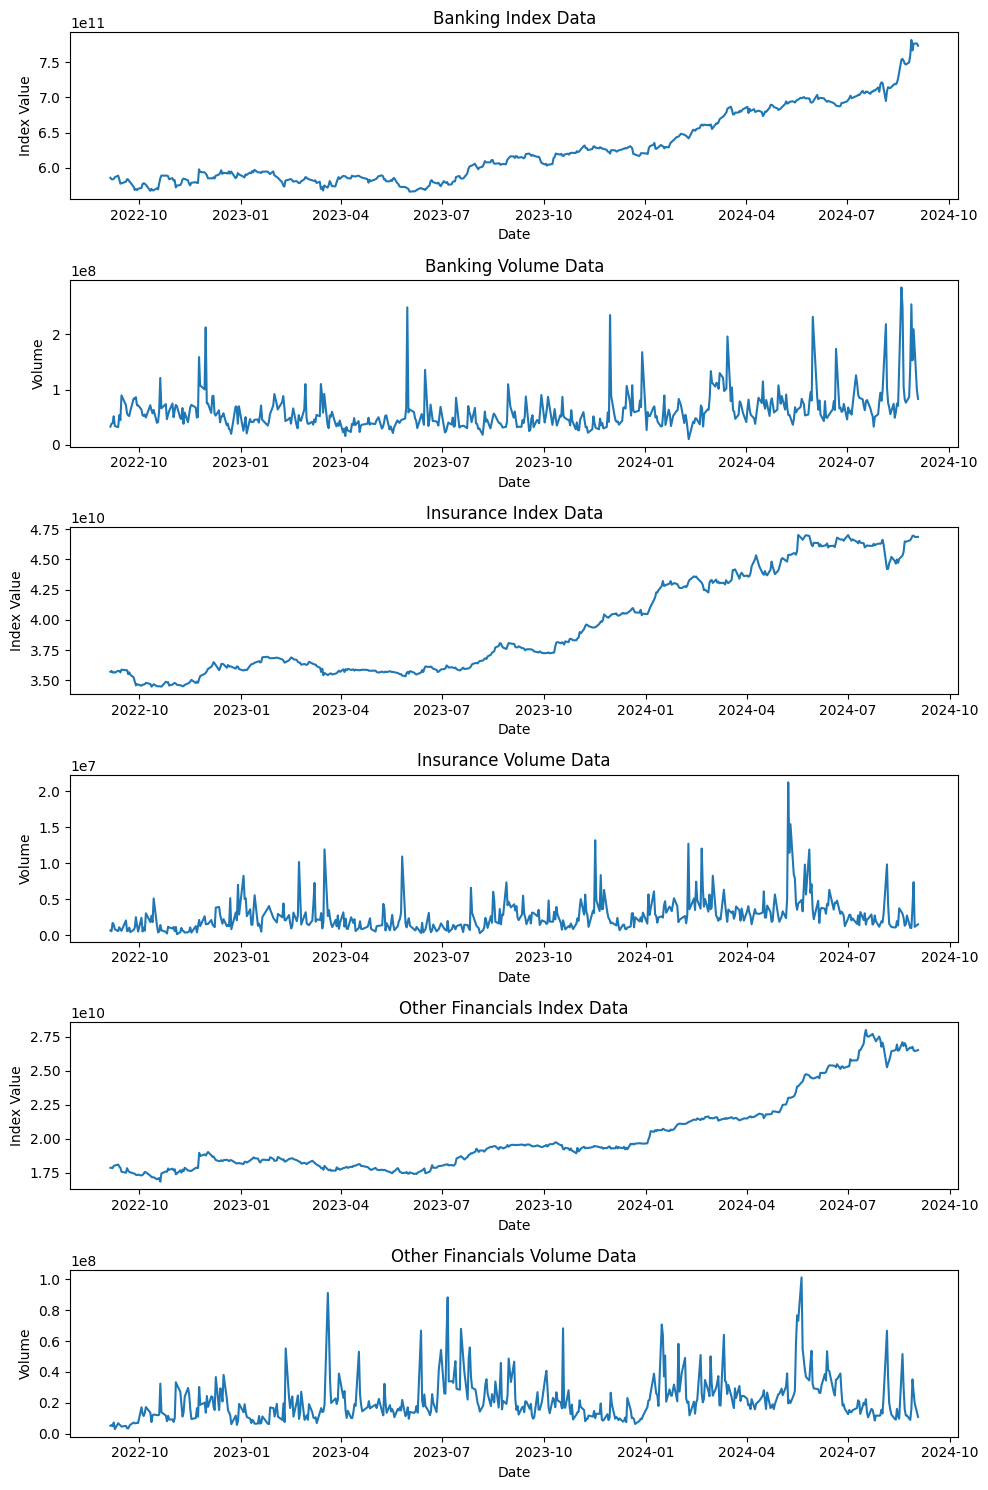

In [58]:
print_sector_index_and_volume_graphs(financial_sector, "Financial")

ERROR:yfinance:0256.KL: Period '2y' is invalid, must be one of ['1d', '5d', '1mo', 'ytd', 'max']


03005
03013


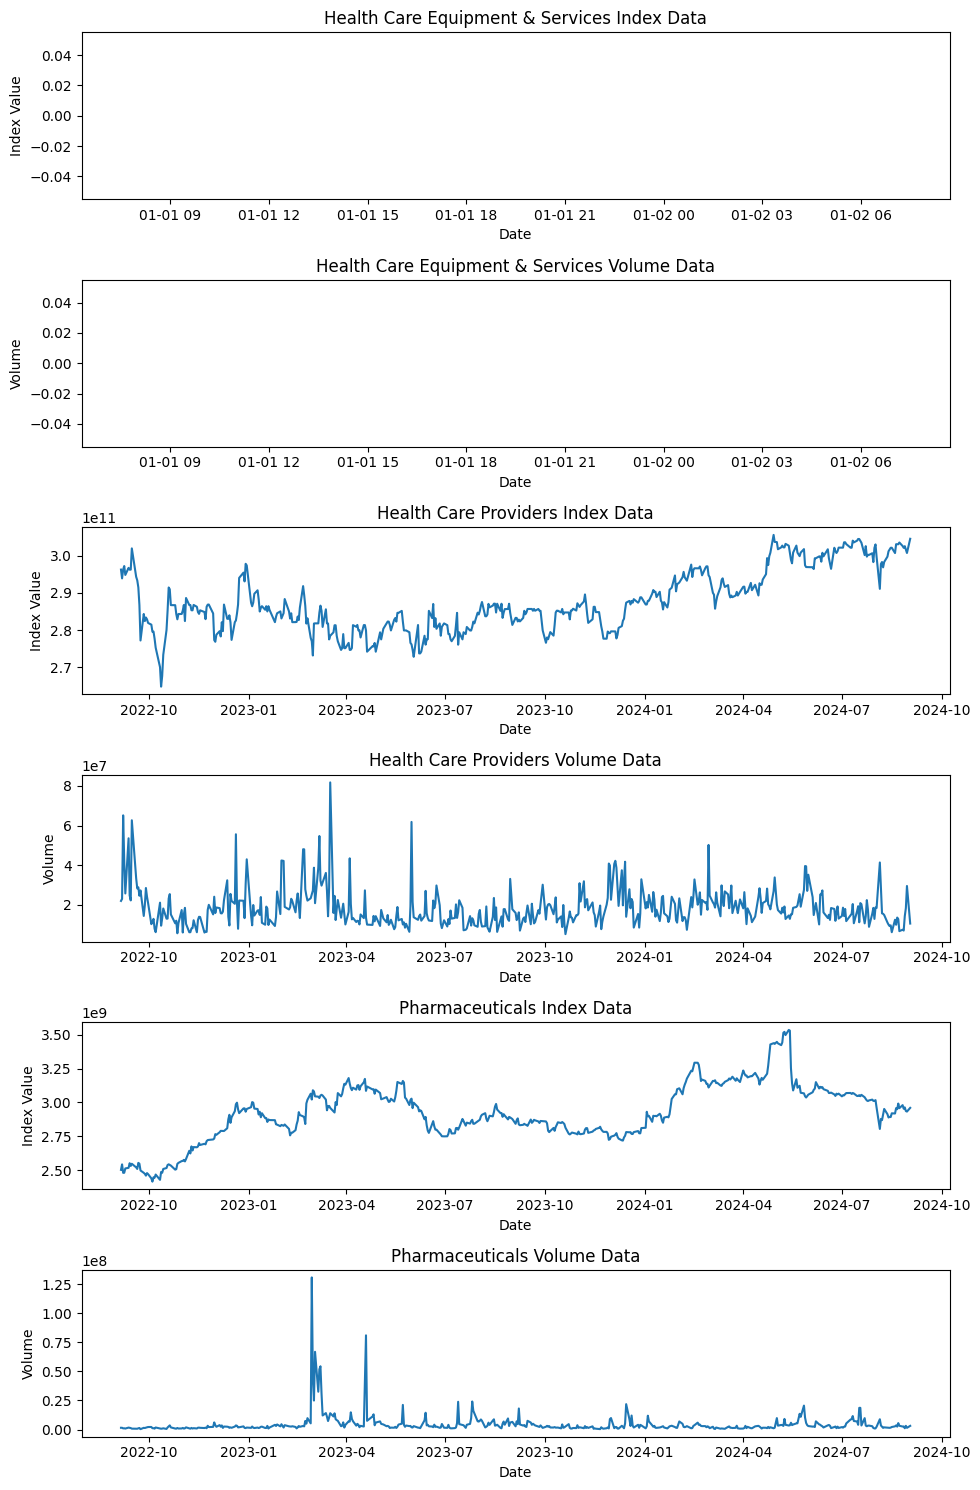

In [59]:
print_sector_index_and_volume_graphs(health_care_sector, "Health Care")

03049
7045
0091


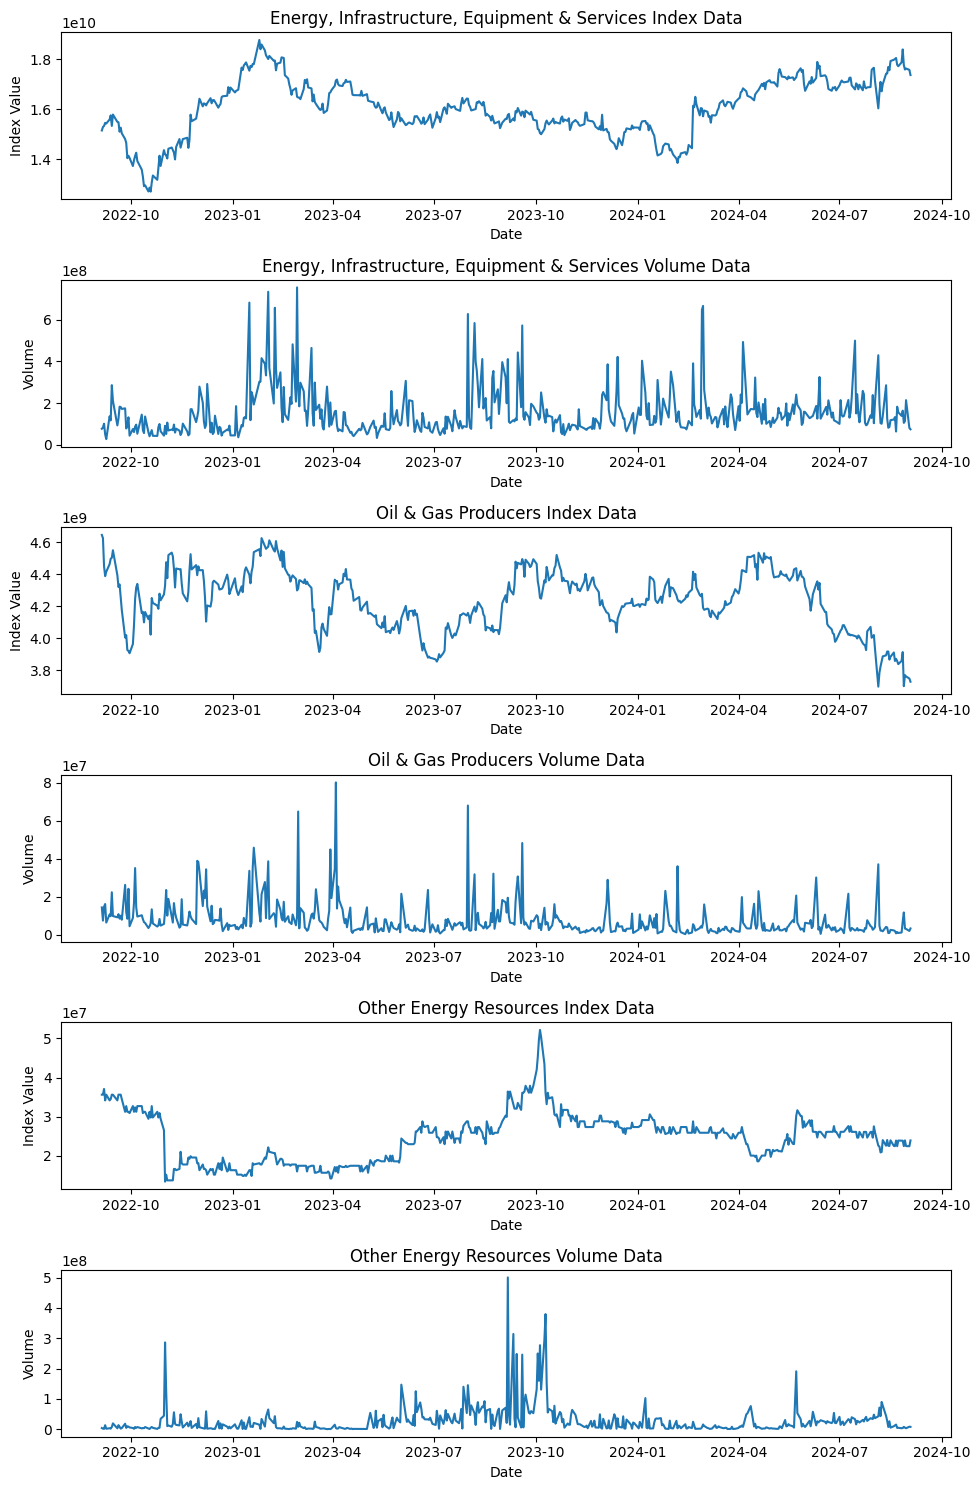

In [60]:
print_sector_index_and_volume_graphs(energy_sector, "Energy")

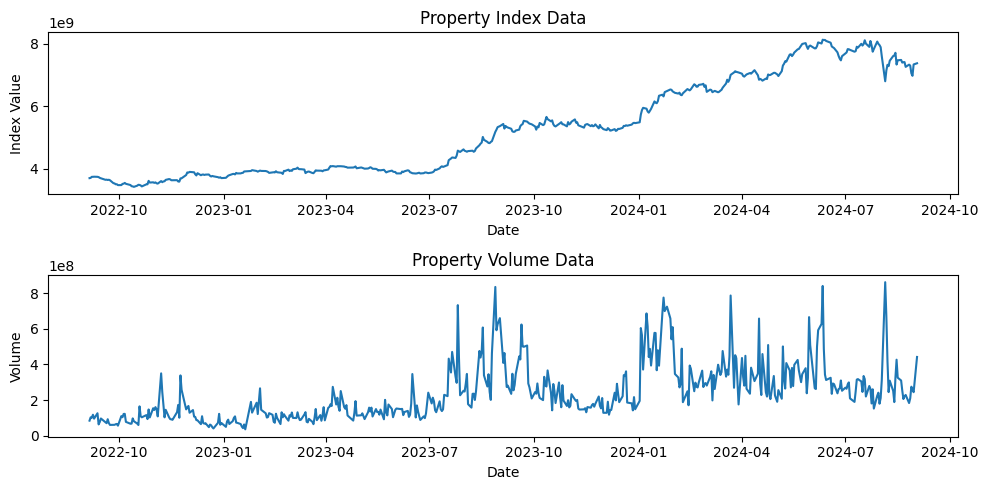

In [61]:
print_sector_index_and_volume_graphs(property_sector, "Property")

ERROR:yfinance:03055.KL: Period '2y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', 'ytd', 'max']


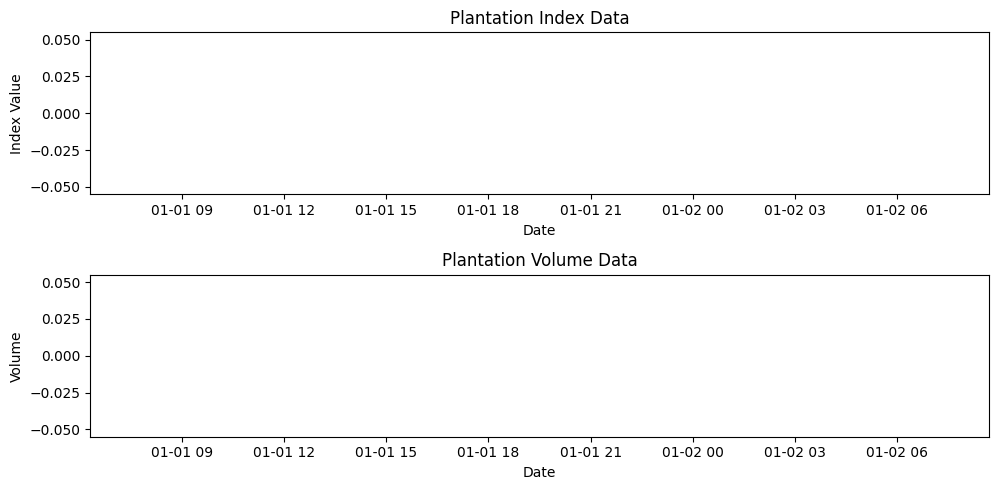

In [62]:
print_sector_index_and_volume_graphs(plantation_sector, "Plantation")

03042


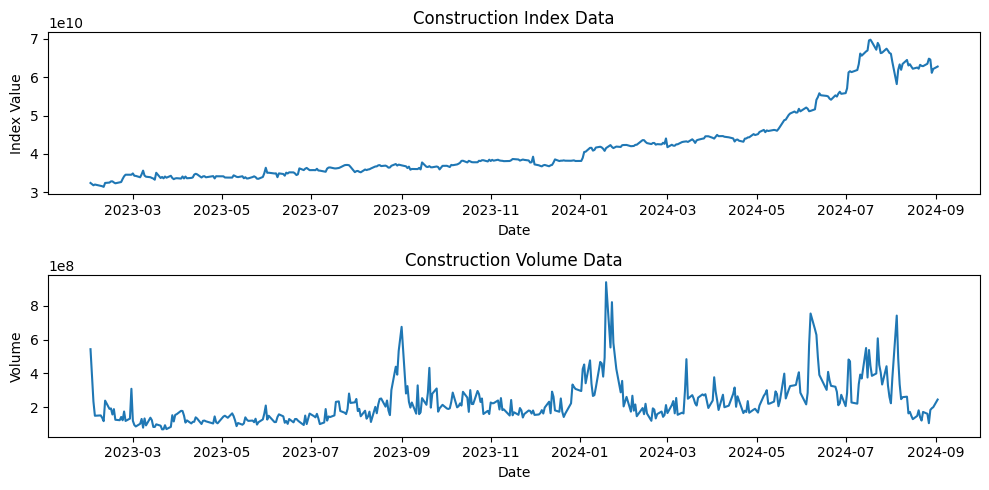

In [63]:
print_sector_index_and_volume_graphs(construction_sector, "Construction")

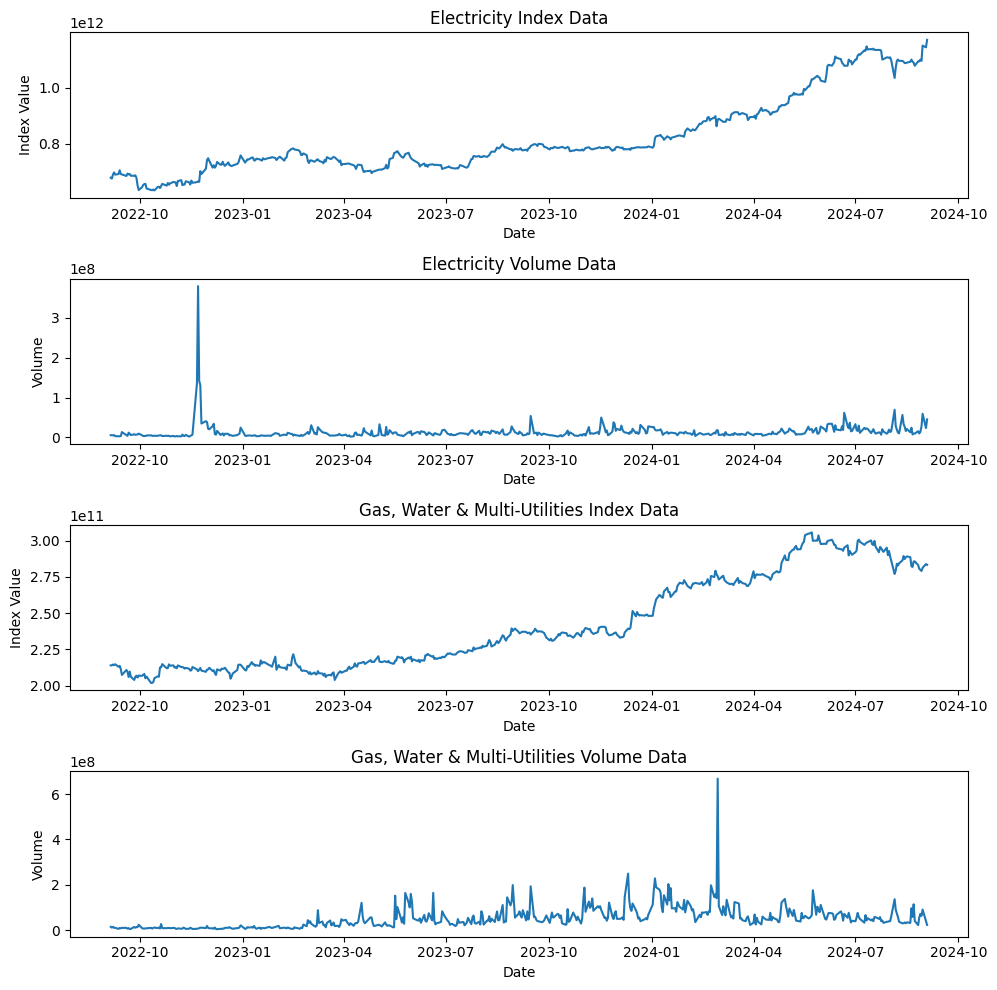

In [64]:
print_sector_index_and_volume_graphs(utility_sector, "Utility")

## Sort Stocks by Market Cap for each Sector